In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path='w12_demand.csv'

In [3]:
df=pd.read_csv(path)

In [5]:
df.head()

,Unnamed: 0,Date,Furniture,Office Supplies,Technology
0,0,2011-01-01,5,14,0
1,46,2011-01-02,0,0,1
2,93,2011-01-03,16,21,11
3,139,2011-01-04,7,37,8
4,185,2011-01-05,1,23,0


In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.set_index('Date')

,Furniture,Office Supplies,Technology
Date,,,
2011-01-01,5,14,0
2011-01-02,0,0,1
2011-01-03,16,21,11
2011-01-04,7,37,8
2011-01-05,1,23,0
...,...,...,...
2014-12-27,24,124,40
2014-12-28,4,39,8
2014-12-29,100,262,46


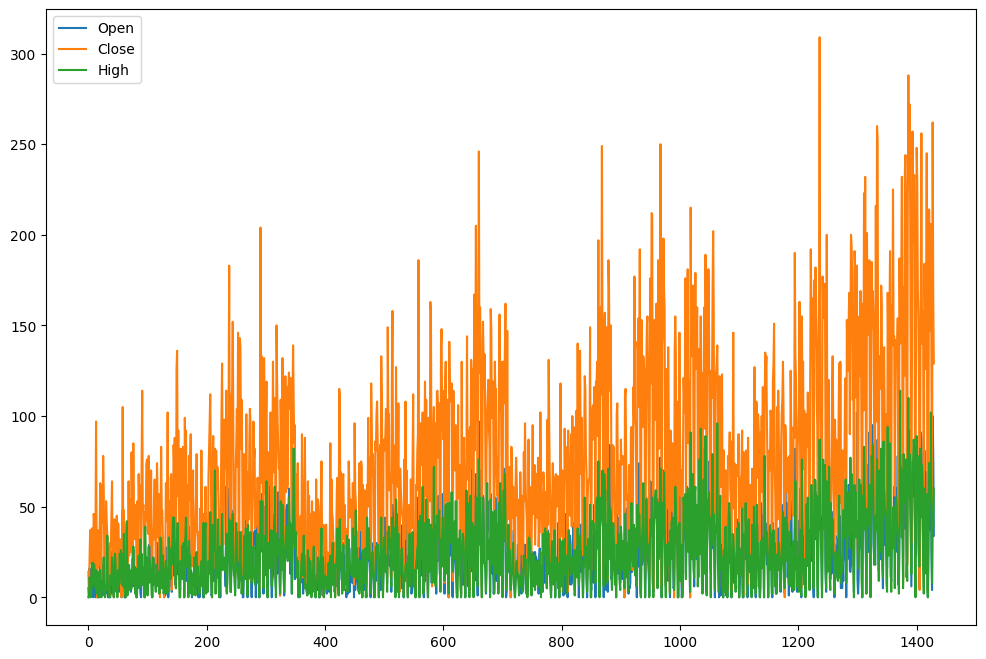

In [10]:
plt.figure(figsize=(12,8))

ypoints = df['Furniture']
y1points = df['Office Supplies']
y2points = df['Technology']


plt.plot(ypoints, label='Open')
plt.plot(y1points, label='Close')
plt.plot(y2points, label='High')

plt.legend()

plt.show()

column Furniture, trend is 0.01755744552528159, intercept is 11.898561815542948
column Office Supplies, trend is 0.05555387407322393, intercept is 35.95850522642976
column Technology, trend is 0.01797796999613813, intercept is 11.753341836360704


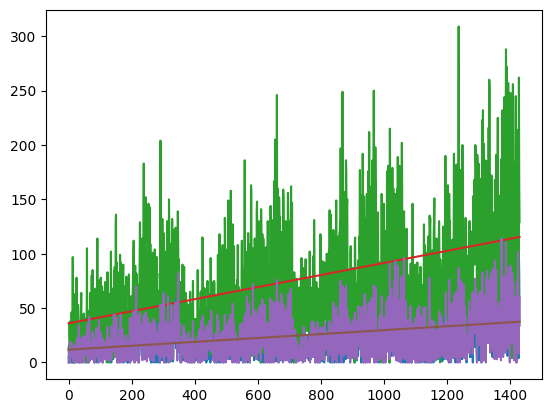

In [19]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det

for c in df.columns[1:]:
    data = list(df[c].values)
    m, n = linreg(range(len(data)),data)  
    print(f"column {c}, trend is {m}, intercept is {n}")
    
    trend = [] 
    for x in range(len(data)):
        y = m * (x+1) + n
        trend.append(y)

    plt.plot( data )
    plt.plot( trend )

plt.show()


In [20]:
df.columns

Index(['Date', 'Furniture', 'Office Supplies', 'Technology'], dtype='object')

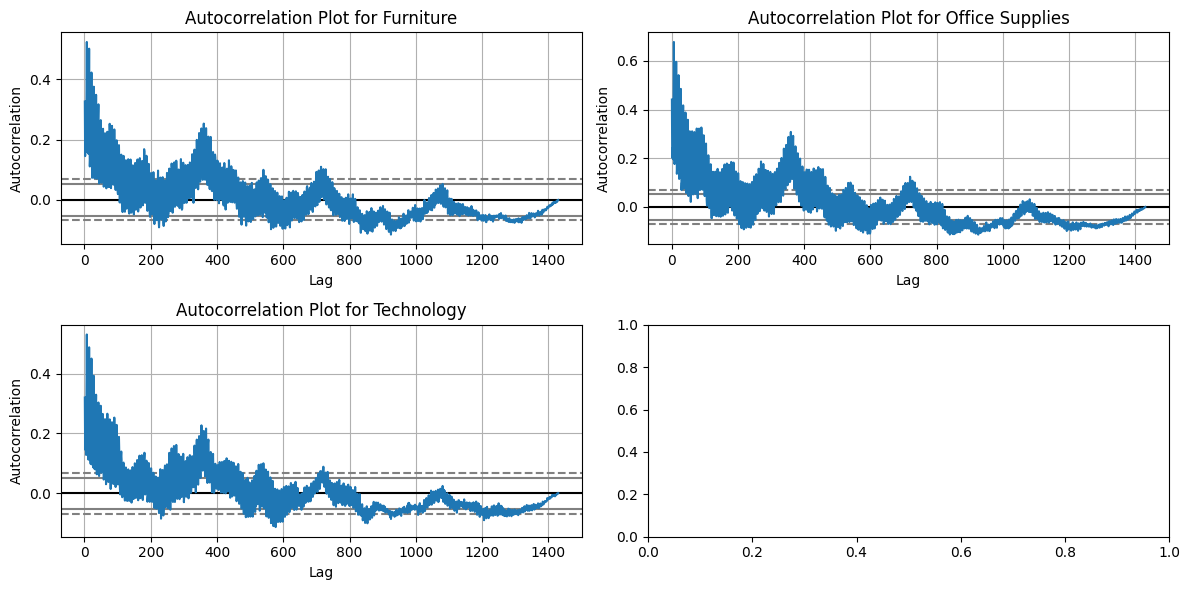

In [21]:
from pandas.plotting import autocorrelation_plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Plot autocorrelation for 'Furniture' column
autocorrelation_plot(df['Furniture'], ax=axes[0, 0])
axes[0, 0].set_title('Autocorrelation Plot for Furniture')

# Plot autocorrelation for 'Office Supplies' column
autocorrelation_plot(df['Office Supplies'], ax=axes[0, 1])
axes[0,1].set_title('Autocorrelation Plot for Office Supplies')

#Plot aurtocorrelation for 'Technology' column
autocorrelation_plot(df['Technology'], ax=axes[1,0])
axes[1,0].set_title('Autocorrelation Plot for Technology')



plt.tight_layout()
plt.show()

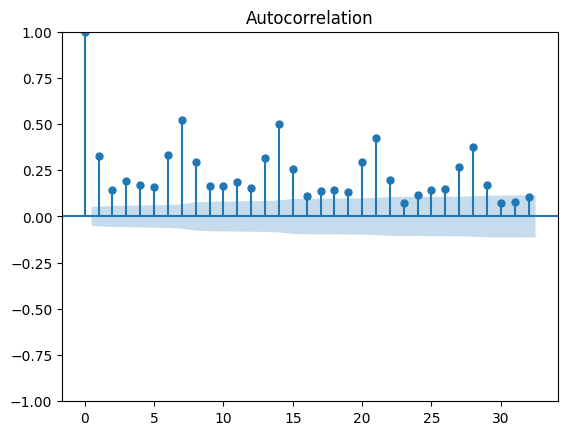

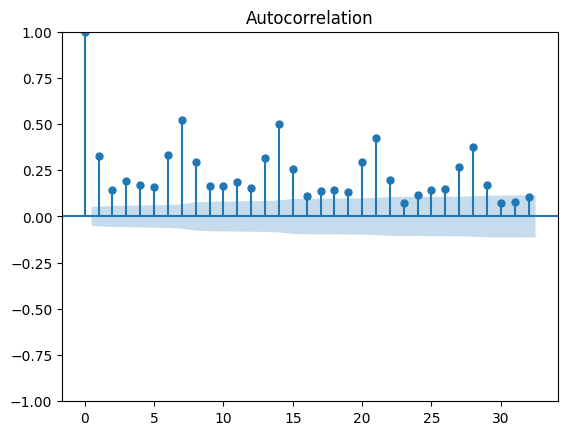

In [26]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
 

df_num=df['Furniture'].values
plot_acf(df_num)

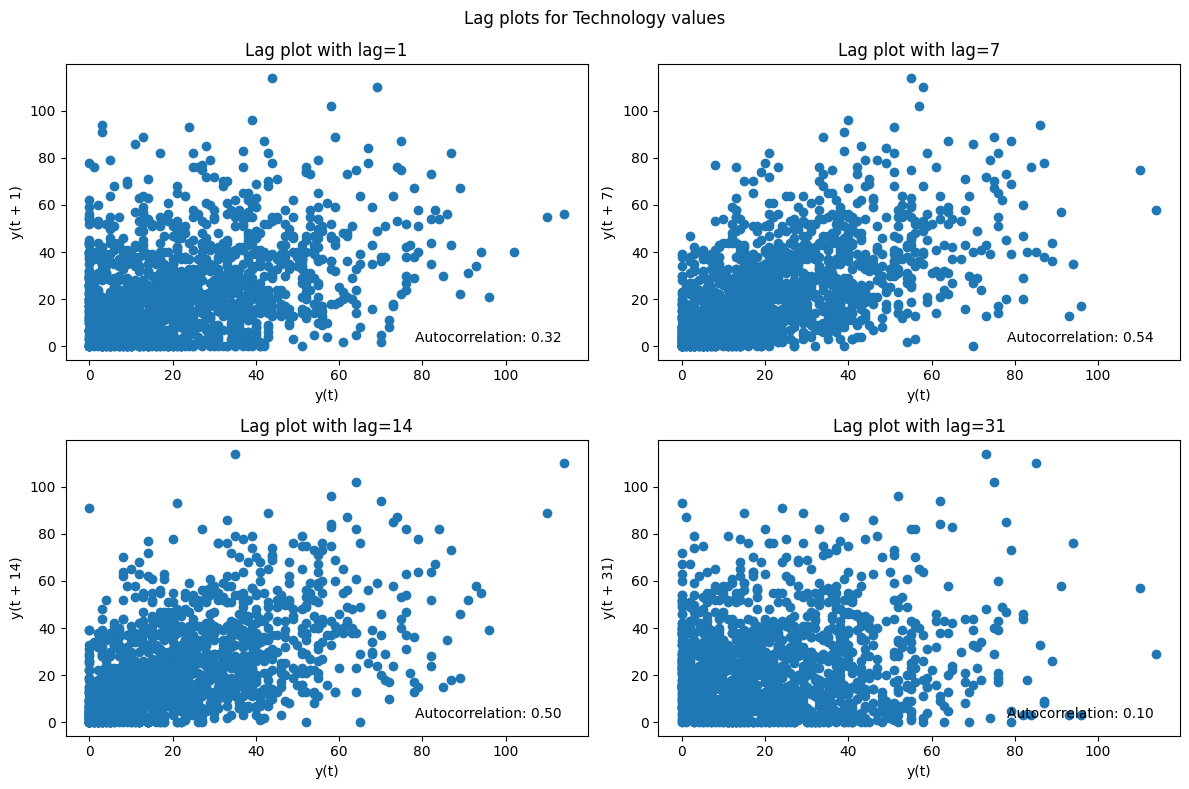

In [29]:
col = df['Technology']

lags = [1, 7, 14, 31]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Lag plots for Technology values")

for lag, ax in zip(lags, axes.flatten()):
    pd.plotting.lag_plot(col, lag=lag, ax=ax)
    ax.set_title(f"Lag plot with lag={lag}")
    
    autocorr = col.autocorr(lag)
    ax.text(0.95, 0.05, f'Autocorrelation: {autocorr:.2f}',  ha='right', va='bottom', transform=ax.transAxes, fontsize=10)

plt.tight_layout()
plt.show()


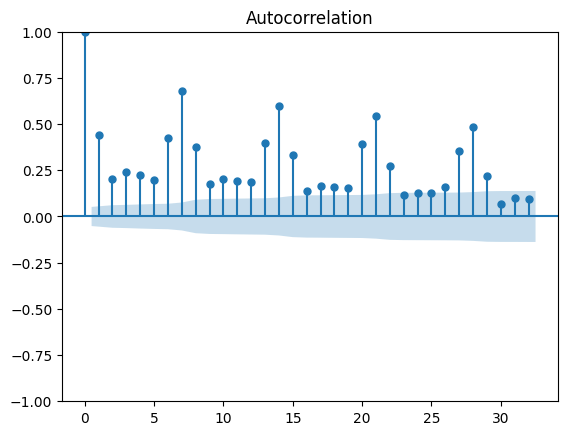

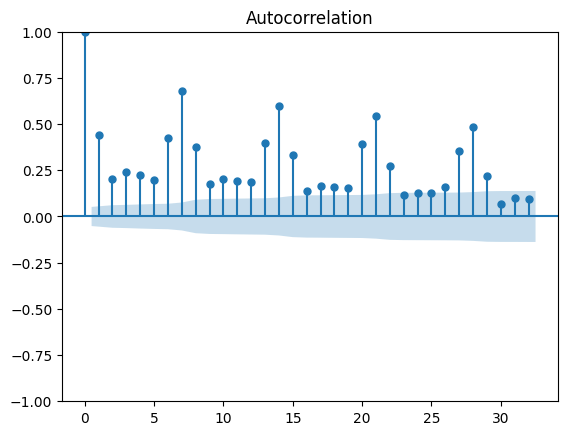

In [27]:
df_num=df['Office Supplies'].values
# plot the auto correlation
plot_acf(df_num)

In [34]:
import statsmodels.api as sm
x=df['Furniture'].values
#calculate autocorrelations
y=sm.tsa.acf(x, nlags=50)
y

array([1.        , 0.32690297, 0.14553339, 0.18953591, 0.16765497,
       0.15989944, 0.33060221, 0.52453317, 0.29736344, 0.16323909,
       0.16450377, 0.18902172, 0.15321034, 0.31596331, 0.50227539,
       0.25780976, 0.11116708, 0.13894672, 0.1438142 , 0.13380842,
       0.2923845 , 0.42313743, 0.19594555, 0.07347554, 0.11592173,
       0.14110171, 0.14720629, 0.26797719, 0.37602742, 0.17295481,
       0.07192627, 0.08042299, 0.10291581, 0.11707671, 0.2370784 ,
       0.34899868, 0.12399923, 0.0705644 , 0.08225948, 0.13023186,
       0.11803   , 0.26920799, 0.31754533, 0.11122428, 0.05492841,
       0.06105667, 0.08821913, 0.13819237, 0.24788466, 0.2650544 ,
       0.11014354])

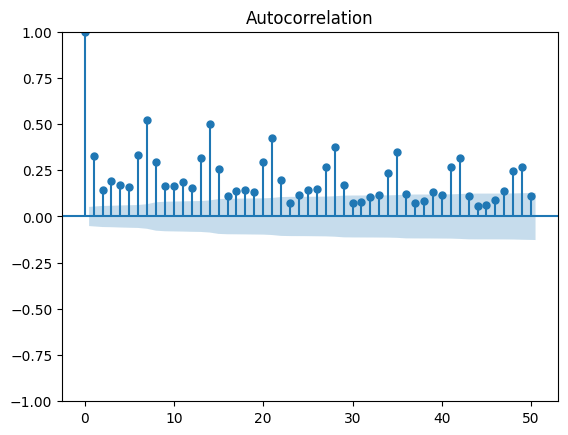

In [35]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(x, lags=50)
plt.show()

In [36]:
path2='D:/code academy/week 12/w12/w12_Global_Superstore2.csv'

In [38]:
df2=pd.read_csv(path2,  encoding='unicode_escape')

In [39]:
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [40]:
df2.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [41]:
pd.set_option('display.max_columns', 500)

In [42]:
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [44]:
df2['Ship Date']=pd.to_datetime(df2['Ship Date'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5324\4143862814.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Ship Date']=pd.to_datetime(df2['Ship Date'])


In [46]:
df2['Order Date']=pd.to_datetime(df2['Order Date'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5324\1342397082.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Order Date']=pd.to_datetime(df2['Order Date'])


In [50]:
datas = []
for g in df2.groupby(by = ['Order Date']):
    data = g[1][['Region', 'Quantity']]
    data = data.groupby(by = ['Region']).agg({'Quantity':'sum'}).to_dict()['Quantity']
    #: SELECT sum(quantity) FROM table GROUP BY Categroy
    data['Date'] = g[0][0]
    datas.append(data)
    

In [51]:
datas = pd.DataFrame( data = datas )
#: Replace the NaNs with 0
datas = datas.fillna(0)
#: Convert to date
datas['Date'] = pd.to_datetime( datas['Date'], format='%d-%m-%Y' )
#: Float to int
for c in datas.select_dtypes(exclude = ['object', 'datetime']):
    datas[c] = datas[c].astype(int)
#: Sort by date
datas = datas.sort_values(by = ['Date'])

In [52]:
datas

,Africa,EMEA,North,Oceania,Date,Canada,Central,Southeast Asia,Caribbean,North Asia,South,East,West,Central Asia
0,2,4,3,10,2011-01-01,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2011-01-02,1,0,0,0,0,0,0,0,0
2,4,11,7,14,2011-01-03,0,4,8,0,0,0,0,0,0
3,2,0,10,0,2011-01-04,0,5,0,12,3,20,0,0,0
4,0,0,8,0,2011-01-05,0,15,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,9,8,33,0,2014-12-27,0,79,26,0,10,14,2,0,7
1426,6,0,14,0,2014-12-28,0,23,0,2,0,0,6,0,0
1427,15,42,45,61,2014-12-29,0,100,23,48,2,27,21,20,4
1428,33,17,20,18,2014-12-30,2,63,68,10,0,28,3,22,0


In [53]:
columns = list(datas.columns)
columns.remove('Date')
columns.insert(0, 'Date')
datas = datas[ columns ]

In [54]:
datas

,Date,Africa,EMEA,North,Oceania,Canada,Central,Southeast Asia,Caribbean,North Asia,South,East,West,Central Asia
0,2011-01-01,2,4,3,10,0,0,0,0,0,0,0,0,0
1,2011-01-02,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2011-01-03,4,11,7,14,0,4,8,0,0,0,0,0,0
3,2011-01-04,2,0,10,0,0,5,0,12,3,20,0,0,0
4,2011-01-05,0,0,8,0,0,15,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,2014-12-27,9,8,33,0,0,79,26,0,10,14,2,0,7
1426,2014-12-28,6,0,14,0,0,23,0,2,0,0,6,0,0
1427,2014-12-29,15,42,45,61,0,100,23,48,2,27,21,20,4
1428,2014-12-30,33,17,20,18,2,63,68,10,0,28,3,22,0


In [59]:
for c in datas.columns[1:]:
    print(c)

Africa
EMEA
North
Oceania
Canada
Central
Southeast Asia
Caribbean
North Asia
South
East
West
Central Asia


In [61]:
#finding Trend
for c in datas.columns[1:]:
    data = datas[c].values
    #* Find the trend
    m, n = linreg(range(len(data)),data)  
    print("TREND", c, m, n)

TREND Africa 0.0055304169330338835 3.4359296887598774
TREND EMEA 0.006265921311407665 3.5768453768453767
TREND North 0.009687642445739546 5.680277374616997
TREND Oceania 0.006691113716741877 4.196821627010307
TREND Canada 0.0004548045505569569 0.2575596311445368
TREND Central 0.02091406590132444 14.261095717699492
TREND Southeast Asia 0.006213055671048462 3.827904590168741
TREND Caribbean 0.003667660752044871 1.7843514975590447
TREND North Asia 0.0035529424150573656 3.6509331339520017
TREND South 0.012494187267415677 8.699476624004927
TREND East 0.00513588926649914 3.7555819442611895
TREND West 0.006346068207509775 4.043356643356644
TREND Central Asia 0.00413552115626399 2.4402750289542743


In [63]:
#finding most correlating lag values for each column
max_val = 0
max_itm = None
for c in datas.columns[1:]:
    for i in range(1, 181):
        corr = abs(datas[c].shift(i).corr( datas[c] )) 
        if corr > max_val:
            max_val = corr
            max_itm = i

    print("AUTOCORR", c, max_val, max_itm)

AUTOCORR Africa 0.22994095482723945 7
AUTOCORR EMEA 0.2736391423144037 7
AUTOCORR North 0.2736391423144037 7
AUTOCORR Oceania 0.2736391423144037 7
AUTOCORR Canada 0.2736391423144037 7
AUTOCORR Central 0.4112570955164979 7
AUTOCORR Southeast Asia 0.4112570955164979 7
AUTOCORR Caribbean 0.4112570955164979 7
AUTOCORR North Asia 0.4112570955164979 7
AUTOCORR South 0.4112570955164979 7
AUTOCORR East 0.4112570955164979 7
AUTOCORR West 0.4112570955164979 7
AUTOCORR Central Asia 0.4112570955164979 7


In [66]:
#find most correlating rolling average
def find_best_correlation(data, window_sizes):
  
    max_corr = 0
    best_window_size = None

    for window_size in window_sizes:
        rolled_data = data.rolling(window=window_size)
        correlations = rolled_data.corr(data.shift(window_size))

        max_corr_for_window = correlations.max()
        if max_corr_for_window > max_corr:
            max_corr = max_corr_for_window
            best_window_size = window_size

    return max_corr, best_window_size

for c in datas.columns[1:]:
    window_sizes_to_try = range(7,120) 
    data_for_c = datas[c]
    max_corr, best_window_size = find_best_correlation(data_for_c, window_sizes_to_try)

    print("Best correlation for column '{}' is {} with window size {}".format(c, max_corr, best_window_size))


Best correlation for column 'Africa' is 0.9920868479556149 with window size 7
Best correlation for column 'EMEA' is 0.9784540190470821 with window size 7
Best correlation for column 'North' is 0.9983304155511523 with window size 12
Best correlation for column 'Oceania' is 0.9825428723970383 with window size 7
Best correlation for column 'Canada' is 1.0000000000001252 with window size 13
Best correlation for column 'Central' is 0.9986003694876636 with window size 7
Best correlation for column 'Southeast Asia' is 0.9851332709315668 with window size 8
Best correlation for column 'Caribbean' is 1.000000000000109 with window size 7
Best correlation for column 'North Asia' is 0.9999999999999998 with window size 7
Best correlation for column 'South' is 0.9816045945721157 with window size 7
Best correlation for column 'East' is 1.0000000000005207 with window size 7
Best correlation for column 'West' is 1.0000000000000075 with window size 9
Best correlation for column 'Central Asia' is 1.000000

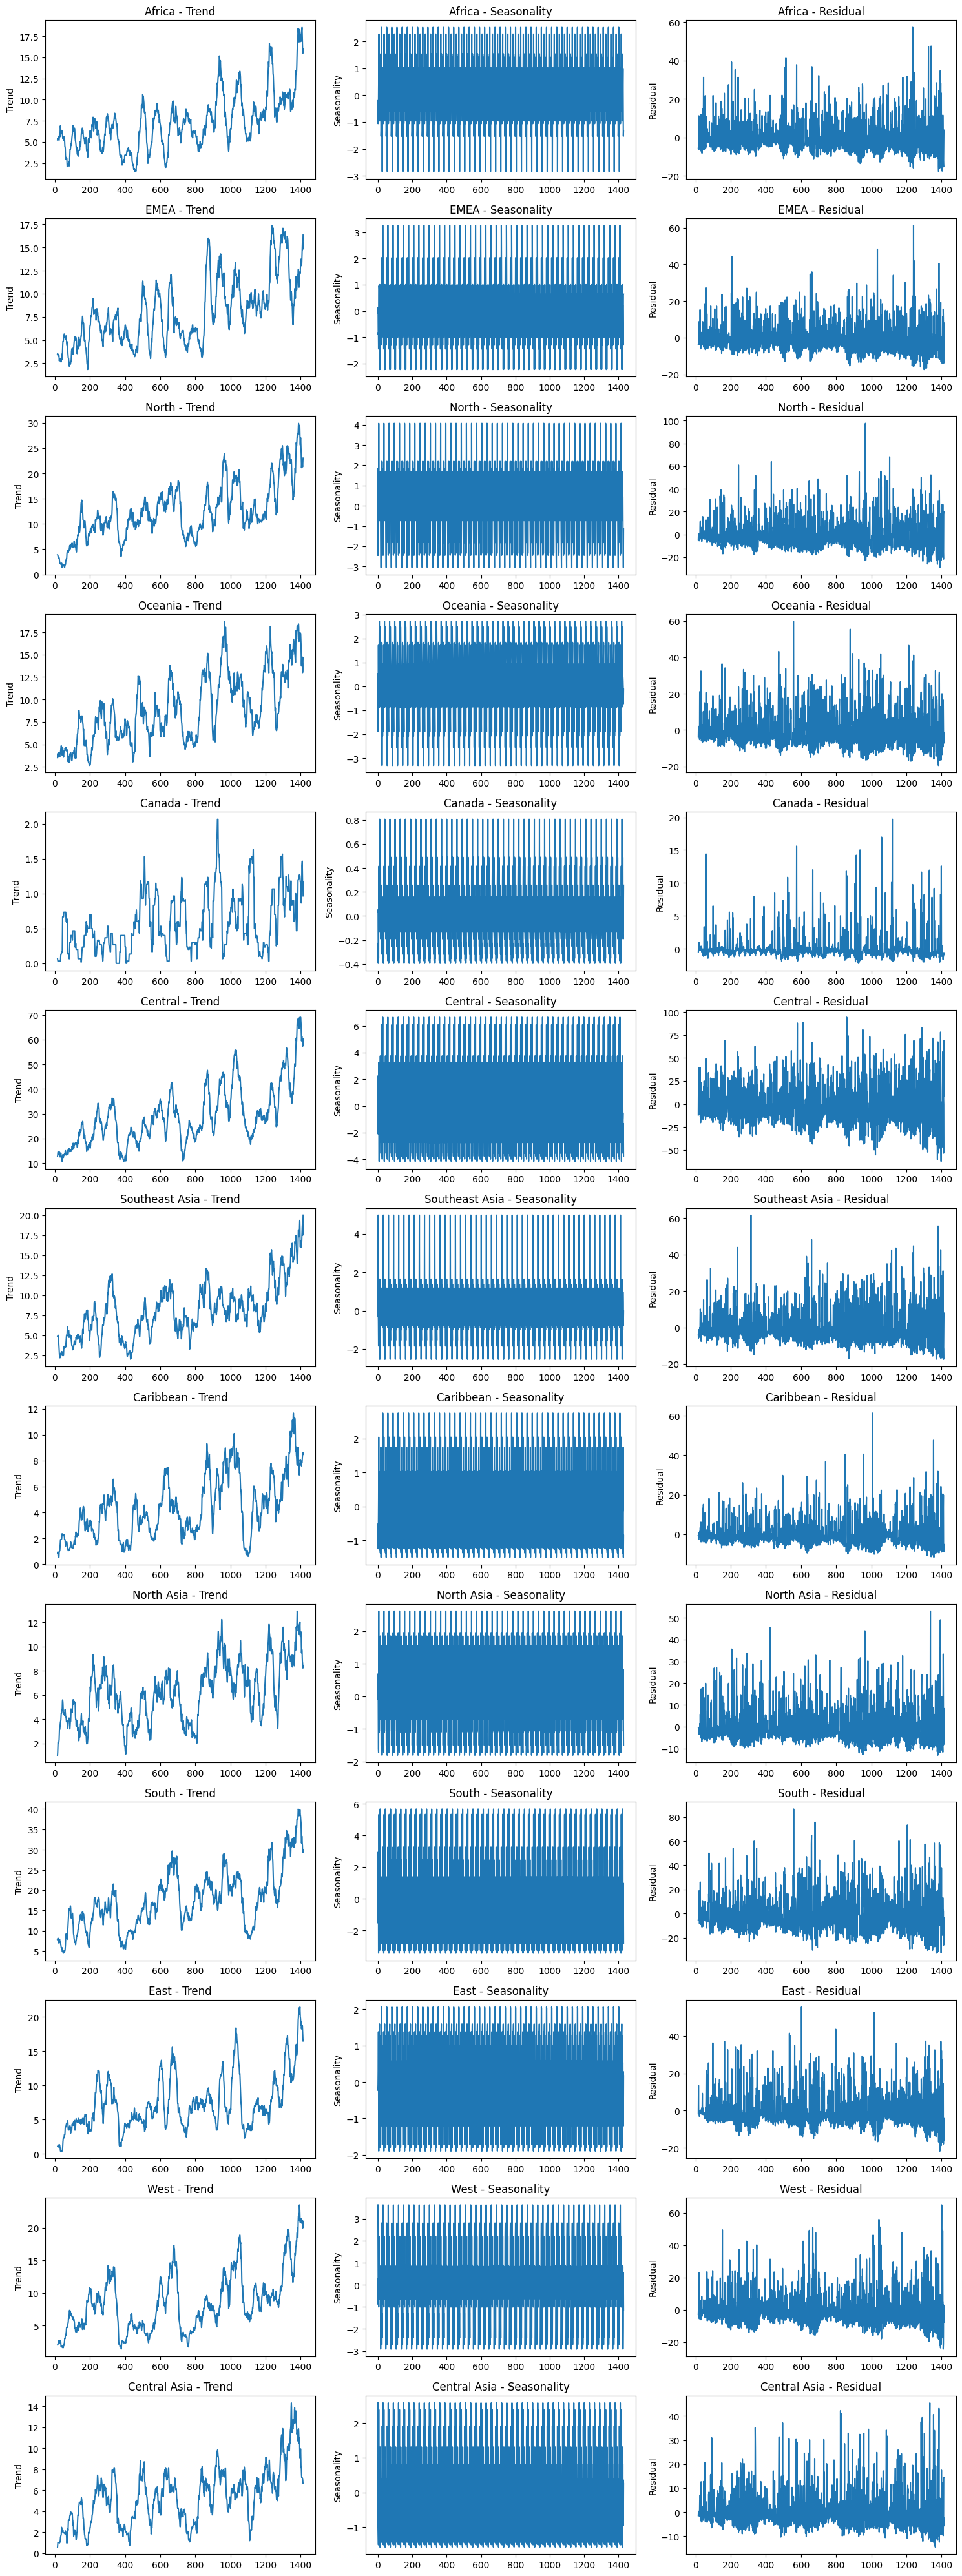

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

columns = datas.columns[1:]

fig, axes = plt.subplots(13, 3, figsize=(15, 40))

for i, column in enumerate(columns):
    data = datas[column]
    res = seasonal_decompose(data, model="additive", period=30)
    
    res.trend.plot(ax=axes[i, 0], ylabel="Trend", title=f"{column} - Trend")
    res.seasonal.plot(ax=axes[i, 1], ylabel="Seasonality", title=f"{column} - Seasonality")
    res.resid.plot(ax=axes[i, 2], ylabel="Residual", title=f"{column} - Residual")

plt.tight_layout()
plt.show()
